In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import LabelEncoder

import random
import operator

from functools import reduce


# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
lpmc = pd.read_csv('../../data/LTDS/cleaned_select.csv')

# Ethnicity

In [81]:
df = pd.read_csv('../../data/testing/nomis/ethnicity.csv', index_col=0)

dct = {}

for b in lpmc.hh_borough.unique():
    dct[b] = df[b].values

df = pd.DataFrame(dct, index=df.index)
df = df.drop('Total', axis=0)

In [82]:
df = df/df.sum(axis=0)

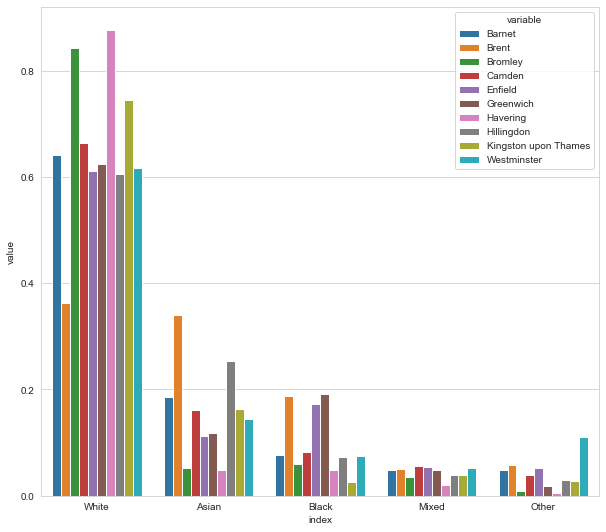

In [83]:
plt.figure(figsize=(10,9))

df2 = pd.melt(df.reset_index(), id_vars=["index"], value_vars=df.columns)

ax = sns.barplot(data=df2, x='index', y='value', hue='variable', order=['White', 'Asian', 'Black', 'Mixed', 'Other'])

In [84]:
df_l = lpmc.groupby(['hh_borough', 'ethnicity']).size().unstack(fill_value=0).T
df_l.index.name = None
df_l.columns.name = None
df_l = df_l/df_l.sum(axis=0)

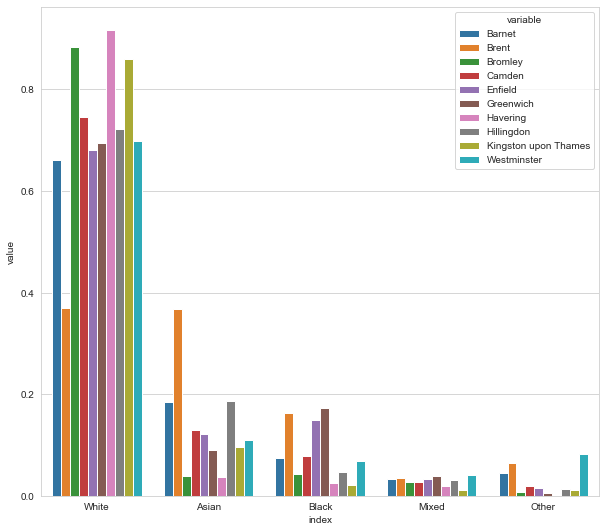

In [85]:
# ethnicity
plt.figure(figsize=(10,9))

df_l2 = pd.melt(df_l.reset_index(), id_vars=["index"], value_vars=df_l.columns)

ax = sns.barplot(data=df_l2, x='index', y='value', hue='variable', order=['White', 'Asian', 'Black', 'Mixed', 'Other'])

In [90]:
df_l.columns

Index(['Barnet', 'Brent', 'Bromley', 'Camden', 'Enfield', 'Greenwich',
       'Havering', 'Hillingdon', 'Kingston upon Thames', 'Westminster'],
      dtype='object')

# Family composition

In [110]:
df = pd.read_csv('../../data/testing/nomis/car_van.csv', index_col=0)

dct = {}

for b in lpmc.hh_borough.unique():
    dct[b] = df[b].values

df = pd.DataFrame(dct, index=df.index)
df = df.drop('Total', axis=0)
df = df.drop('#vehicles', axis=0)

In [111]:
df = df/df.sum(axis=0)

In [112]:
df

,Barnet,Brent,Bromley,Camden,Enfield,Greenwich,Havering,Hillingdon,Kingston upon Thames,Westminster
0,0.287119,0.429964,0.234774,0.611018,0.324669,0.420159,0.230085,0.226675,0.251371,0.629004
1,0.441390,0.395318,0.455541,0.317746,0.432569,0.426127,0.442062,0.438482,0.472729,0.301299
2,0.211145,0.134958,0.236195,0.059026,0.183437,0.123935,0.245177,0.251392,0.215905,0.056064
3,0.045675,0.031092,0.054042,0.009351,0.044431,0.022970,0.060803,0.061119,0.044957,0.009454
4+,0.014671,0.008668,0.019448,0.002861,0.014894,0.006809,0.021873,0.022332,0.015038,0.004179


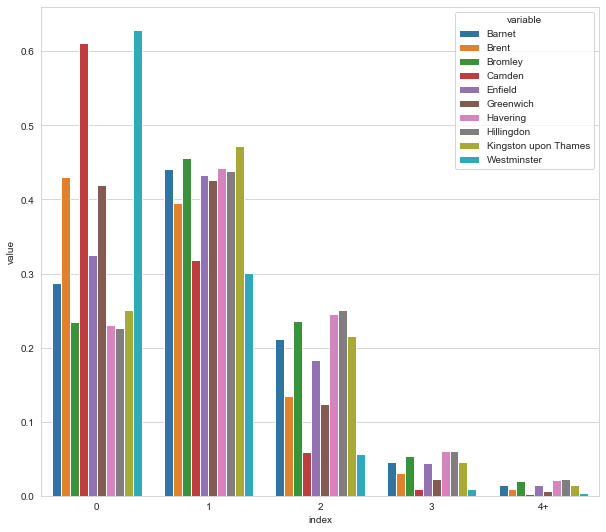

In [113]:
plt.figure(figsize=(10,9))

df2 = pd.melt(df.reset_index(), id_vars=["index"], value_vars=df.columns)

ax = sns.barplot(data=df2, x='index', y='value', hue='variable')#, order=['1', '2', '3', '4', '5', '6', '7', '8+'])

In [117]:
lpmc['hh_carvan'] = lpmc['hh_carvan'].apply(lambda x: str(x) if x < 4 else '4+')

In [118]:
df_l = lpmc.groupby(['hh_borough', 'hh_carvan']).size().unstack(fill_value=0).T
df_l.index.name = None
df_l.columns.name = None
df_l = df_l/df_l.sum(axis=0)

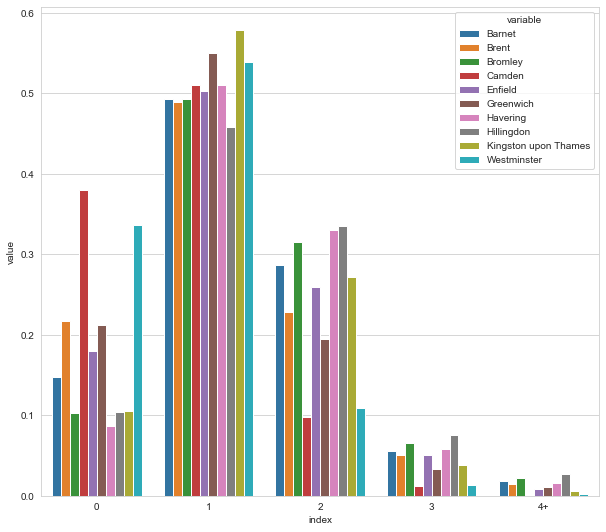

In [119]:
plt.figure(figsize=(10,9))

df_l2 = pd.melt(df_l.reset_index(), id_vars=["index"], value_vars=df_l.columns)

ax = sns.barplot(data=df_l2, x='index', y='value', hue='variable')#, order=['Couple family', 'Lone parent', 'Single', 'Other'])

In [121]:
df

,Barnet,Brent,Bromley,Camden,Enfield,Greenwich,Havering,Hillingdon,Kingston upon Thames,Westminster
0,0.287119,0.429964,0.234774,0.611018,0.324669,0.420159,0.230085,0.226675,0.251371,0.629004
1,0.441390,0.395318,0.455541,0.317746,0.432569,0.426127,0.442062,0.438482,0.472729,0.301299
2,0.211145,0.134958,0.236195,0.059026,0.183437,0.123935,0.245177,0.251392,0.215905,0.056064
3,0.045675,0.031092,0.054042,0.009351,0.044431,0.022970,0.060803,0.061119,0.044957,0.009454
4+,0.014671,0.008668,0.019448,0.002861,0.014894,0.006809,0.021873,0.022332,0.015038,0.004179


In [122]:
df_l

,Barnet,Brent,Bromley,Camden,Enfield,Greenwich,Havering,Hillingdon,Kingston upon Thames,Westminster
0,0.147584,0.217314,0.102726,0.379545,0.179525,0.212017,0.086824,0.103709,0.105155,0.336742
1,0.492692,0.489147,0.493351,0.510000,0.502671,0.549560,0.509599,0.457482,0.578694,0.539080
2,0.286033,0.228672,0.315160,0.097727,0.259347,0.194413,0.329843,0.335352,0.271478,0.108839
3,0.055420,0.050227,0.066157,0.011818,0.050148,0.033295,0.058028,0.075953,0.038488,0.013148
4+,0.018270,0.014639,0.022606,0.000909,0.008309,0.010716,0.015707,0.027504,0.006186,0.002191
